In [9]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('loan.csv')

In [11]:
binary_mapping = {' Graduate': 1, ' Not Graduate': 0, ' Yes': 1, ' No': 0, ' Approved': 1, ' Rejected': 0}
df['education'] = df['education'].map(binary_mapping)
df['self_employed'] = df['self_employed'].map(binary_mapping)
df['loan_status'] = df['loan_status'].map(binary_mapping)

In [12]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
X = df.drop('loan_status', axis=1)  
y = df['loan_status']
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [17]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.76      0.29      0.42       322
           1       0.69      0.95      0.80       532

    accuracy                           0.70       854
   macro avg       0.73      0.62      0.61       854
weighted avg       0.72      0.70      0.66       854

Confusion Matrix for Polynomial kernel:
[[ 94 228]
 [ 29 503]]


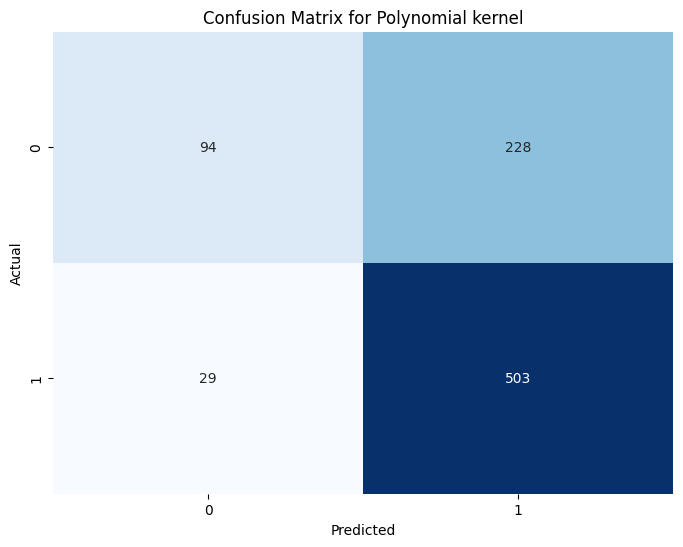

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       313
           1       0.95      0.95      0.95       541

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854

Confusion Matrix for RBF kernel:
[[288  25]
 [ 25 516]]


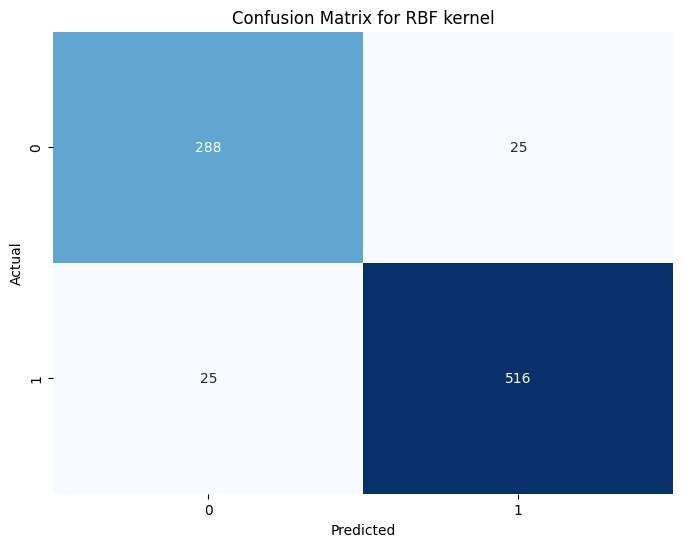

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       293
           1       0.88      0.87      0.87       561

    accuracy                           0.83       854
   macro avg       0.81      0.82      0.81       854
weighted avg       0.83      0.83      0.83       854

Confusion Matrix for Sigmoid kernel:
[[224  69]
 [ 75 486]]


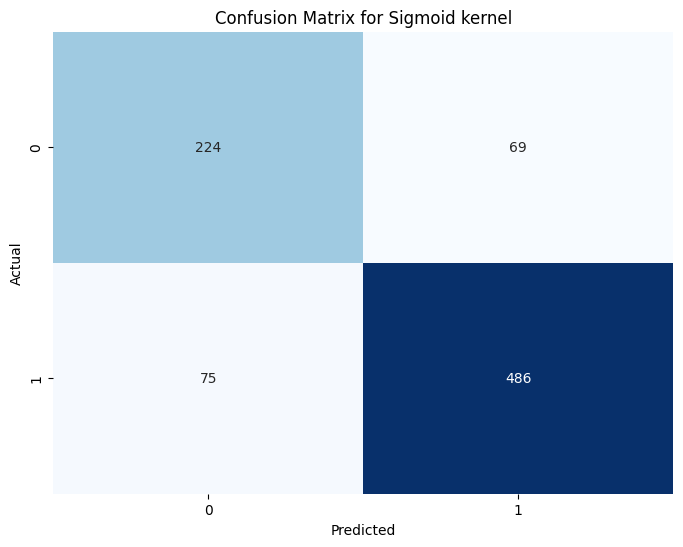

Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       321
           1       0.94      0.94      0.94       533

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854

Confusion Matrix for Linear kernel:
[[288  33]
 [ 30 503]]


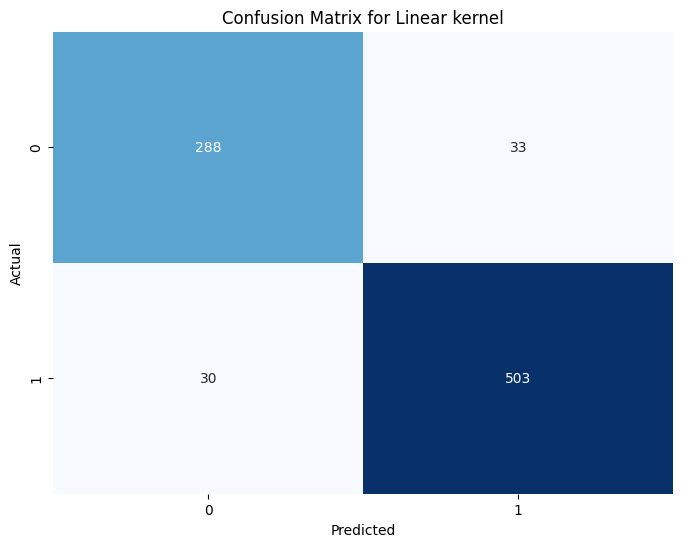

In [19]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    # Imprime la matriz de confusión
    print("Confusion Matrix for", kernels[i], "kernel:")
    print(cm)

    # Visualiza la matriz de confusión utilizando seaborn y matplotlib
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix for " + kernels[i] + " kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.939 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.915 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [27]:
best_svc = SVC(C=1000, gamma=0.01, kernel='rbf')
best_svc.fit(X_train, y_train)

SVC(C=1000, gamma=0.01)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       321
           1       0.94      0.94      0.94       533

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854



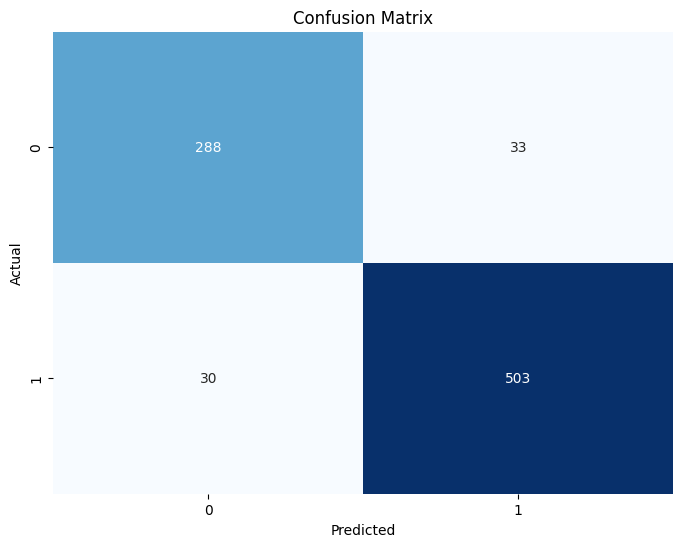

In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtener y mostrar la matriz de confusión utilizando seaborn y matplotlib
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['poly']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.909 total time=   0.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   0.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.924 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.925 total time=   1.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.930 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.871 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.892 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.890 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.892 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.902 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.622 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=3)

In [30]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=10, gamma=0.1, kernel='poly')


In [31]:
best_svc = SVC(C=10, gamma=0.1, kernel='poly')
best_svc.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='poly')

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       321
           1       0.94      0.94      0.94       533

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854



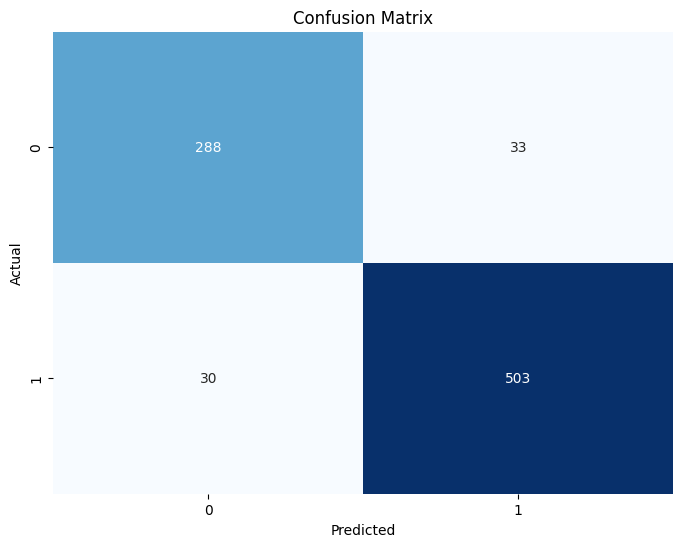

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtener y mostrar la matriz de confusión utilizando seaborn y matplotlib
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()